In [35]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

input_file = "/home/jeans/nvaitc/battery_timeseries/resources/raw/train_bat_data.pkl"

with open(input_file, "rb") as file:
    train_dict = pickle.load(file)

input_file = "/home/jeans/nvaitc/battery_timeseries/resources/raw/val_bat_data.pkl"

with open(input_file, "rb") as file:
    val_dict = pickle.load(file)
    
loaded_dict = train_dict | val_dict

# print("Loaded Dictionary:", loaded_dict.keys())
# print("first cell:", loaded_dict['b1c1'].keys())
# print("'b1c1' - qdn", len(loaded_dict['b1c1']['q_d_n']),  loaded_dict['b1c1']['q_d_n'])
# print("'b1c1' - cycle", loaded_dict['b1c1']['cycle'])

/tmp/ipykernel_16176/1775417510.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=10)


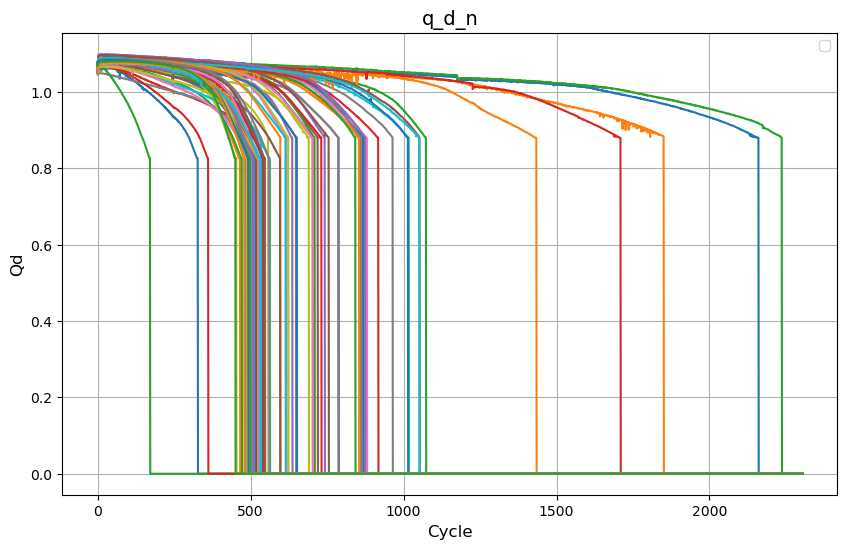

In [36]:
# Plot the graph
plt.figure(figsize=(10, 6))
for cell_id in loaded_dict:
    x_values = list(range(2304))
    q_d_n_values  = loaded_dict[cell_id]['q_d_n']
    cycle = loaded_dict[cell_id]['cycle']
    # plt.plot(x_values, q_d_n_values, label=f'{cell_id}_{cycle}')
    plt.plot(x_values, q_d_n_values)

# Add labels and title
plt.xlabel('Cycle', fontsize=12)
plt.ylabel('Qd', fontsize=12)
plt.title('q_d_n', fontsize=14)

# Add grid and legend
plt.grid(True)
plt.legend(fontsize=10)

# Show the plot
plt.show()

## First approach: mean of x distance diff (u can skip this, it doesn't works)

In [37]:
from collections import defaultdict

mean_x_diff = defaultdict(lambda : [])
for bat in loaded_dict:
    QD = loaded_dict[bat]['q_d_n']
    print(bat)
    print("- - - - - - - - - - -")
    steps = [10,30,50,100,150,200,300,500]
    for step in steps:
        stepped_array = QD[::step]
        print(stepped_array)
        mean_diff = np.mean(    np.diff(stepped_array)  ) * 100
        mean_x_diff[step].append((float(mean_diff), bat))
        print(step, mean_diff)
    print("- - - - - - - - - - -")

b1c1
- - - - - - - - - - -
[1.0499999523162842, 1.0800153017044067, 1.0818721055984497, 1.0819486379623413, 1.0818428993225098, 1.0816856622695923, 1.0816125869750977, 1.0812519788742065, 1.081079363822937, 1.0809322595596313, 1.0806502103805542, 1.080399990081787, 1.080352544784546, 1.0800989866256714, 1.0797325372695923, 1.0793943405151367, 1.0792441368103027, 1.078906536102295, 1.0790042877197266, 1.0784056186676025, 1.078312873840332, 1.078372597694397, 1.0774751901626587, 1.0771740674972534, 1.077012538909912, 1.0767171382904053, 1.0766741037368774, 1.075950026512146, 1.075730562210083, 1.0760154724121094, 1.0750923156738281, 1.0747573375701904, 1.0744972229003906, 1.075011968612671, 1.0758748054504395, 1.0745515823364258, 1.0741947889328003, 1.074432373046875, 1.0735968351364136, 1.0735201835632324, 1.0730301141738892, 1.0729448795318604, 1.0730366706848145, 1.071900725364685, 1.0715832710266113, 1.0716311931610107, 1.0707228183746338, 1.0709905624389648, 1.0701998472213745, 1.06

In [38]:
mean10diff = sorted(mean_x_diff[10])
print(mean10diff[0:5])
print(mean10diff[-5:])
np.var([ x[0] for x in mean10diff], ddof=1) 

[(-0.4689904917841372, 'b2c20'), (-0.4678682658983313, 'b2c13'), (-0.46777761500814685, 'b2c33'), (-0.4677072815273119, 'b2c22'), (-0.4675500807554825, 'b2c36')]
[(-0.45652171839838446, 'b1c5'), (-0.45652171839838446, 'b1c6'), (-0.45652171839838446, 'b1c7'), (-0.45652171839838446, 'b1c9'), (-0.454532996467922, 'b2c19')]


1.9280009944743947e-05

In [39]:
mean30diff = sorted(mean_x_diff[30])
print(mean30diff[0:5])
print(mean30diff[-5:])
np.var([ x[0] for x in mean30diff], ddof=1) 

[(-1.4193133303993628, 'b2c20'), (-1.4159171204817922, 'b2c13'), (-1.415642782261497, 'b2c33'), (-1.4154299309379175, 'b2c22'), (-1.414954191760013, 'b2c36')]
[(-1.3815788846266897, 'b1c5'), (-1.3815788846266897, 'b1c6'), (-1.3815788846266897, 'b1c7'), (-1.3815788846266897, 'b1c9'), (-1.3755603840476587, 'b2c19')]


0.00017657765340667745

In [40]:
mean50diff = sorted(mean_x_diff[50])
print(mean50diff[0:5])
print(mean50diff[-5:])
np.var([ x[0] for x in mean50diff], ddof=1) 

[(-2.344952458920686, 'b2c20'), (-2.3393413294916567, 'b2c13'), (-2.3388880750407344, 'b2c33'), (-2.3385364076365596, 'b2c22'), (-2.3377504037774126, 'b2c36')]
[(-2.282608591991922, 'b1c5'), (-2.282608591991922, 'b1c6'), (-2.282608591991922, 'b1c7'), (-2.282608591991922, 'b1c9'), (-2.2726649823396103, 'b2c19')]


0.0004820002486186075

In [41]:
mean150diff = sorted(mean_x_diff[150])
print(mean150diff[0:5])
print(mean150diff[-5:])
np.var([ x[0] for x in mean150diff], ddof=1) 

[(-7.1911875406901045, 'b2c20'), (-7.173980077107747, 'b2c13'), (-7.172590096791585, 'b2c33'), (-7.171511650085449, 'b2c22'), (-7.169101238250733, 'b2c36')]
[(-6.9999996821085615, 'b1c5'), (-6.9999996821085615, 'b1c6'), (-6.9999996821085615, 'b1c7'), (-6.9999996821085615, 'b1c9'), (-6.969505945841472, 'b2c19')]


0.004532944560342043

## Second approach: avg of gradient (only back half)

In [ ]:
for bat in loaded_dict:
    print(bat)
    trimmed_arr = np.trim_zeros(loaded_dict[bat]['q_d_n'], 'b')
    trimmed_arr = trimmed_arr[len(trimmed_arr)//2:]
    print(np.gradient(trimmed_arr))
    print(np.mean(np.gradient(trimmed_arr)))
    
    loaded_dict[bat]['mean_backhalf_grad'] = np.mean(np.gradient(trimmed_arr))


b1c1
[1.043567180633545, 1.0437906980514526, 1.0429614782333374, 1.0433794260025024, 1.043189525604248, 1.0430939197540283, 1.0432097911834717, 1.0428955554962158, 1.0428173542022705, 1.0431532859802246, 1.043156385421753, 1.0424493551254272, 1.0432595014572144, 1.0428022146224976, 1.0430561304092407, 1.0431090593338013, 1.0421391725540161, 1.042829990386963, 1.0423885583877563, 1.0424987077713013, 1.0426993370056152, 1.0424740314483643, 1.042673110961914, 1.0422804355621338, 1.0421233177185059, 1.0421754121780396, 1.042304277420044, 1.0428392887115479, 1.04209303855896, 1.0424538850784302, 1.0423312187194824, 1.0419275760650635, 1.0421899557113647, 1.0418976545333862, 1.0414321422576904, 1.0420116186141968, 1.0412808656692505, 1.0420191287994385, 1.0420705080032349, 1.042047142982483, 1.0418667793273926, 1.0414308309555054, 1.0419740676879883, 1.0419318675994873, 1.041343331336975, 1.0413645505905151, 1.0414867401123047, 1.0412157773971558, 1.0414959192276, 1.04135262966156, 1.0415447

In [43]:
loaded_dict

{'b1c1': {'q_d_n': [1.0499999523162842,
   1.075301170349121,
   1.0766123533248901,
   1.0772981643676758,
   1.0781505107879639,
   1.078544020652771,
   1.0789694786071777,
   1.0793800354003906,
   1.0795894861221313,
   1.079776644706726,
   1.0800153017044067,
   1.0845894813537598,
   1.0823009014129639,
   1.0819395780563354,
   1.081835150718689,
   1.0819742679595947,
   1.0820032358169556,
   1.0819748640060425,
   1.0818729400634766,
   1.0818581581115723,
   1.0818721055984497,
   1.0819226503372192,
   1.0819178819656372,
   1.0820436477661133,
   1.0820176601409912,
   1.0820863246917725,
   1.0821022987365723,
   1.0820186138153076,
   1.0819743871688843,
   1.081928014755249,
   1.0819486379623413,
   1.0819107294082642,
   1.0819109678268433,
   1.0819156169891357,
   1.0819072723388672,
   1.081823468208313,
   1.081803321838379,
   1.0817220211029053,
   1.0817707777023315,
   1.081763505935669,
   1.0818428993225098,
   1.0818408727645874,
   1.081842303276062,
   

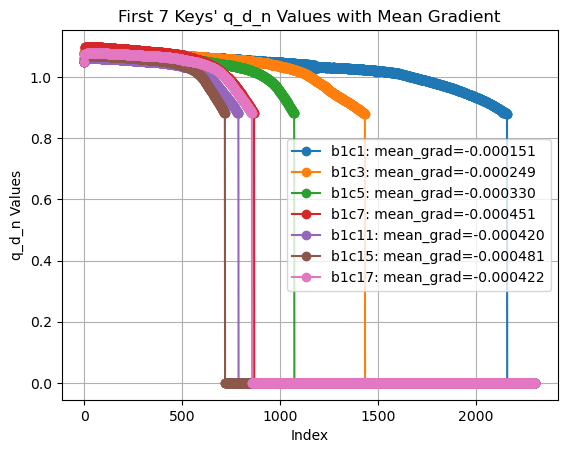

In [44]:
first_7_keys = list(loaded_dict.keys())[:7]

# Plotting each key's q_d_n
for key in first_7_keys:
    q_d_n = loaded_dict[key]['q_d_n']
    mean_grad = loaded_dict[key]['mean_backhalf_grad']
    plt.plot(q_d_n, marker='o', label=f"{key}: mean_grad={mean_grad:.6f}")

plt.xlabel("Index")
plt.ylabel("q_d_n Values")
plt.title("First 7 Keys' q_d_n Values with Mean Gradient")
plt.legend()
plt.grid(True)
plt.show()

In [45]:

head = 2
print(loaded_dict.keys())
for batteryID in loaded_dict.keys():
    print(batteryID, loaded_dict[batteryID].keys())
    print("q_d_n", len(loaded_dict[batteryID]['q_d_n']),  loaded_dict[batteryID]['q_d_n'])
    print("cycle", loaded_dict[batteryID]['cycle'])
    head -= 1
    if head == 0:
        break

dict_keys(['b1c1', 'b1c3', 'b1c5', 'b1c7', 'b1c11', 'b1c15', 'b1c17', 'b1c19', 'b1c21', 'b1c24', 'b1c26', 'b1c28', 'b1c30', 'b1c32', 'b1c34', 'b1c36', 'b1c38', 'b1c40', 'b1c42', 'b1c44', 'b2c0', 'b2c2', 'b2c4', 'b2c6', 'b2c11', 'b2c13', 'b2c17', 'b2c19', 'b2c21', 'b2c23', 'b2c25', 'b2c27', 'b2c29', 'b2c31', 'b2c33', 'b2c35', 'b2c37', 'b2c39', 'b2c41', 'b2c43', 'b2c45', 'b1c0', 'b1c2', 'b1c4', 'b1c6', 'b1c9', 'b1c14', 'b1c16', 'b1c18', 'b1c20', 'b1c23', 'b1c25', 'b1c27', 'b1c29', 'b1c31', 'b1c33', 'b1c35', 'b1c37', 'b1c39', 'b1c41', 'b1c43', 'b1c45', 'b2c1', 'b2c3', 'b2c5', 'b2c10', 'b2c12', 'b2c14', 'b2c18', 'b2c20', 'b2c22', 'b2c24', 'b2c26', 'b2c28', 'b2c30', 'b2c32', 'b2c34', 'b2c36', 'b2c38', 'b2c40', 'b2c42', 'b2c44', 'b2c46'])
b1c1 dict_keys(['q_d_n', 'cycle', 'mean_backhalf_grad'])
q_d_n 2304 [1.0499999523162842, 1.075301170349121, 1.0766123533248901, 1.0772981643676758, 1.0781505107879639, 1.078544020652771, 1.0789694786071777, 1.0793800354003906, 1.0795894861221313, 1.07977664